### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Week 1: Predicting business outcomes with regression!

This week, we will take a deep dive into predictive analytics and, more specifically, regression modelling. You will use this notebook to follow along with the demonstrations throughout the week. This is your notebook. Use it to follow along with the demonstrations, test ideas and explore what is possible. The hands-on experience of writing your own code will accelarate your learning!

For more tips: https://jupyter-notebook.readthedocs.io/en/latest/ui_components.html

### 1.1 Advanced Analytics using Python

In [1]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

In [2]:
# Import statsmodel for statistical calculations and 
# ‘TTestIndPower’ class to calculate the parameters.
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

In [6]:
# Specify the three required parameters for the power analysis:
alpha = 0.05 
power = 0.8 
effect = sms.proportion_effectsize(0.13, 0.15) 

# Perform power analysis by using the solve_power() function:
# Specify an instance of ‘TTestIndPower’.
analysis = TTestIndPower() 
# Calculate the sample size and list the parameters.
result = analysis.solve_power(effect, power=power, nobs1=None,
                              ratio=1.0, alpha=alpha) 

In [7]:
# Print the output.
print('Sample Size: %.3f' % result)

Sample Size: 4720.435


### 1.1.5 A/B testing in Python

In [8]:
# Install the relevant modules:
!pip install scipy

# Import necessary libraries, packages and classes.
import pandas as pd
import math
import numpy as np
import statsmodels.stats.api as sms
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
# Read the CSV file.
df = pd.read_csv('ab_data.csv')

# View the DataFrame.
print(df.shape)
df.head()

(294478, 5)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
# Check the metadata.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [14]:
# Pandas's duplicated() function to check the user_id column. 
print(df[df.user_id.duplicated()])

        user_id                   timestamp      group landing_page  converted
2656     698120  2017-01-15 17:13:42.602796    control     old_page          0
2893     773192  2017-01-14 02:55:59.590927  treatment     new_page          0
7500     899953  2017-01-07 03:06:54.068237    control     new_page          0
8036     790934  2017-01-19 08:32:20.329057  treatment     new_page          0
10218    633793  2017-01-17 00:16:00.746561  treatment     old_page          0
...         ...                         ...        ...          ...        ...
294308   905197  2017-01-03 06:56:47.488231  treatment     new_page          0
294309   787083  2017-01-17 00:15:20.950723    control     old_page          0
294328   641570  2017-01-09 21:59:27.695711    control     old_page          0
294331   689637  2017-01-13 11:34:28.339532    control     new_page          0
294355   744456  2017-01-13 09:32:07.106794  treatment     new_page          0

[3894 rows x 5 columns]


In [15]:
# Use ‘drop_duplicates’ to return the Series without the duplicate values.
df2 = df.drop_duplicates(subset = 'user_id') 

# Check the metadata.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [16]:
# Use ‘dropped.drop’ to remove irrelevant columns from the DataFrame. 
# Specify that ‘user_id’ and ‘timestamp’ are columns (i.e. ‘axis 1’). 
df3 = df2.drop(['user_id', 'timestamp'], axis=1)  

# Check the DataFrame.
df3.head()

,group,landing_page,converted
0,control,old_page,0
1,control,old_page,0
2,treatment,new_page,0
3,treatment,new_page,0
4,control,old_page,1


In [17]:
# Use ‘crosstab’ to compute a simple cross-tabulation between two variables.
pd.crosstab(df3['group'], df3['landing_page'])

landing_page,new_page,old_page
group,,
control,1006,144226
treatment,144314,1038


In [18]:
# Specify groups to be dropped.
df4 = df3[((df3.group == 'control') & (df3.landing_page == 'old_page')) | (
    (df3.group == 'treatment') & (df3.landing_page == 'new_page'))]

# Print the shape of the new ‘final’ table.
print(df4.shape)
df4['group'].value_counts()

(288540, 3)


treatment    144314
control      144226
Name: group, dtype: int64

In [19]:
# Re-check/compute another simple cross-tabulation.
pd.crosstab(df4['group'], df4['landing_page'])

landing_page,new_page,old_page
group,,
control,0,144226
treatment,144314,0


In [20]:
# Obtain a simple random sample for control and treatment groups with n = 4721; 
# set random_stategenerator seed at an arbitrary value of 22.
# Obtain a simple random sample for the control group.
c_sample = df4[df4['group'] == 'control'].sample(n=4721,
                                                 random_state=22) 
# Obtain a simple random sample for the treatment group.
t_sample = df4[df4['group'] == 'treatment'].sample(n=4721,
                                                   random_state=22)

In [23]:
# Obtain a simple random sample for control and treatment groups with n = 4721; 
# set random_stategenerator seed at an arbitrary value of 22.
# Obtain a simple random sample for the control group.
control_sample = df4[df4['group'] == 'control'].sample(n=4721,
                                                 random_state=22) 
# Obtain a simple random sample for the treatment group.
treatment_sample = df4[df4['group'] == 'treatment'].sample(n=4721,
                                                   random_state=22)

# Join the two samples.  
ab_test = pd.concat([control_sample, treatment_sample], axis=0)  

# Reset the A/B index.
ab_test.reset_index(drop=True, inplace=True) 

# Print the sample table.
ab_test 

,group,landing_page,converted
0,control,old_page,0
1,control,old_page,0
2,control,old_page,0
3,control,old_page,0
4,control,old_page,0
...,...,...,...
9437,treatment,new_page,0
9438,treatment,new_page,0
9439,treatment,new_page,0
9440,treatment,new_page,0


In [24]:
# Import library.
from scipy.stats import sem

# Group the ab_test data set by group and aggregate by converted.
conversion_rates = ab_test.groupby('group')['converted']

# Calculate conversion rates by calculating the means of columns STD_p and SE_p.
conversion_rates = conversion_rates.agg([np.mean, np.std,sem])

# Assign names to the three columns.
conversion_rates.columns = ['conversion_rate', 'std_deviation','std_error']  

# Round the output to 3 decimal places.
conversion_rates.style.format('{:.3f}') 

,conversion_rate,std_deviation,std_error
group,,,
control,0.124,0.330,0.005
treatment,0.115,0.319,0.005


In [25]:
# Import proportions_ztest and proportion_confint from statsmodels.
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Create a subset of control and treatment results.
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

# Determine the count of the control_results and 
# treatment_result sub-datasets and store them in their respective variables.
n_con = control_results.count()
n_treat = treatment_results.count()

# Create a variable ‘success’ with the sum of the two data sets
# in a list format: 
successes = [control_results.sum(), treatment_results.sum()]

# Create a variable ‘nobs’ which stores the values of 
# variables n_con and n_treat in list format. 
nobs = [n_con, n_treat] 

# Use the imported libraries to calculate the statistical values. 
z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes,
                                                                        nobs=nobs,
                                                                        alpha=0.05)

# Print the outputs (with lead-in text).
print(f'Z test stat: {z_stat:.2f}')
print(f'P-value: {pval:.3f}')
print(f'Confidence Interval of 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Confidence Interval of 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

Z test stat: 1.40
P-value: 0.163
Confidence Interval of 95% for control group: [0.115, 0.134]
Confidence Interval of 95% for treatment group: [0.106, 0.124]


### 1.1.8 Conducting a what-if analysis with Python

In [26]:
# Install Python Sensitivity Analysis . 
!pip install sensitivity  

# This might take some time to install.

In [27]:
# Defines classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd
# Import in-built module for generating random numbers. 
import random 
# Display output inline.
%matplotlib inline
# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer 

In [28]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented programming (OPP).
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    starting_salary: int = 300000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.025
    promo_raise: float = 0.15
    savings_rate: float = 0.20
    interest_rate: float = 0.07
    desired_cash: int = 1500000

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data

ModelInputs(starting_salary=300000, promos_every_n_years=5, cost_of_living_raise=0.025, promo_raise=0.15, savings_rate=0.2, interest_rate=0.07, desired_cash=1500000)

In [29]:
# Get the wage at a given year from the start of the model based 
# on the cost of living raises and regular promotions.
def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and
    # taking out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)  
    
   # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

In [31]:
# Show the first four salaries in the range and 
# print the results using the f-string.
for i in range(4):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

The wage at year 1 is £307,500.
The wage at year 2 is £315,188.
The wage at year 3 is £323,067.
The wage at year 4 is £331,144.


In [32]:
# Change to show the salaries for the first 10 years 
# only and print the results using the f-string:
for i in range(10):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

The wage at year 1 is £307,500.
The wage at year 2 is £315,188.
The wage at year 3 is £323,067.
The wage at year 4 is £331,144.
The wage at year 5 is £390,336.
The wage at year 6 is £400,094.
The wage at year 7 is £410,097.
The wage at year 8 is £420,349.
The wage at year 9 is £430,858.
The wage at year 10 is £507,874.


In [33]:
# Calculate the cash saved within a given year by first 
# calculating the salary at that year then applying the savings rate.
def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

In [34]:
# Calculate the accumulated wealth for a given year based
# on previous wealth, the investment rate, and cash saved during the year.
def wealth_year(data: ModelInputs, year, prior_wealth):
                cash_saved = cash_saved_during_year(data, year)
                wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
                return wealth

In [35]:
# Start with no cash saved.
prior_wealth = 0  
for i in range(4):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is £{wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth:
    prior_wealth = wealth

The wealth at year 1 is £61,500.
The wealth at year 2 is £128,842.
The wealth at year 3 is £202,475.
The wealth at year 4 is £282,877.


In [36]:
def years_to_retirement(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The wealth at year {year} is £{wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
       
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print.
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

In [37]:
years = years_to_retirement(model_data)

Wealths over time:
The wealth at year 1 is £61,500.
The wealth at year 2 is £128,842.
The wealth at year 3 is £202,475.
The wealth at year 4 is £282,877.
The wealth at year 5 is £380,745.
The wealth at year 6 is £487,417.
The wealth at year 7 is £603,555.
The wealth at year 8 is £729,874.
The wealth at year 9 is £867,136.
The wealth at year 10 is £1,029,411.
The wealth at year 11 is £1,205,583.
The wealth at year 12 is £1,396,691.
The wealth at year 13 is £1,603,844.

Retirement:
It will take 13 years to retire.


### 1.1.10 Running a sensitivity and scenario analysis in Python

In [38]:
# Define the function that accepts the individual parameters.
def years_to_retirement_separate_args(
    # List the parameters and set their values.
    starting_salary=60000, 
    promos_every_n_years=5, 
    cost_of_living_raise=0.02,
    promo_raise= 0.15, 
    savings_rate=0.25, 
    interest_rate=0.05, 
    desired_cash=1500000):  
    # Update the values of the parameters:
    data = ModelInputs(
        starting_salary=starting_salary, 
        promos_every_n_years=promos_every_n_years, 
        cost_of_living_raise=cost_of_living_raise, 
        promo_raise=promo_raise, 
        savings_rate=savings_rate, 
        interest_rate=interest_rate, 
        desired_cash=desired_cash)
       
    return years_to_retirement(data, print_output=False)

# Call the function.
years_to_retirement_separate_args()

28

In [39]:
# Use Python’s ‘list comprehensions’ syntax to make it easier to adjust the inputs. 
# Use i as a temporary variable to store the value’s position in the range:
sensitivity_values = {
    'starting_salary': [i * 10000 for i in range(4, 8)],
    'promos_every_n_years': [i for i in range(4, 8)],
    'cost_of_living_raise': [i/100 for i in range(1, 4)],
    'promo_raise': [i/100 for i in range(10, 25, 5)],
    'savings_rate': [i/100 for i in range(10, 50, 10)],
    'interest_rate': [i/100 for i in range(3, 8)],
    'desired_cash': [i * 100000 for i in range(10, 26, 5)]}

In [40]:
# Run the Python’s SensitivityAnalyzer with the all the assigned inputs:
sa = SensitivityAnalyzer(
    sensitivity_values,
    years_to_retirement_separate_args,
    result_name='Years to Retirement',
    reverse_colors=True,
    grid_size=3)

100%|███████████████████████████████████| 11520/11520 [00:06<00:00, 1674.25it/s]


In [41]:
# Display the results using a DataFrame.
styled_dict = sa.styled_dfs(num_fmt='{:.1f}') 

,4,5,6,7
starting_salary,,,,
40000,35.1,36.8,38.0,38.9
50000,32.4,33.9,35.0,35.8
60000,30.2,31.6,32.6,33.3
70000,28.4,29.7,30.6,31.3


,0.01,0.02,0.03
starting_salary,,,
40000,39.8,37.1,34.7
50000,36.6,34.2,32.0
60000,34.0,31.9,29.9
70000,32.0,29.9,28.2


,0.1,0.15,0.2
starting_salary,,,
40000,39.1,37.1,35.4
50000,36.0,34.2,32.6
60000,33.5,31.9,30.5
70000,31.4,30.0,28.7


,0.1,0.2,0.3,0.4
starting_salary,,,,
40000,48.1,38.3,33.0,29.3
50000,44.9,35.3,30.1,26.7
60000,42.3,33.0,27.9,24.6
70000,40.2,31.0,26.1,22.9


,0.03,0.04,0.05,0.06,0.07
starting_salary,,,,,
40000,42.3,39.4,36.9,34.7,32.7
50000,38.8,36.2,34.0,32.0,30.3
60000,36.0,33.7,31.7,29.9,28.3
70000,33.8,31.7,29.8,28.2,26.7


,1000000,1500000,2000000,2500000
starting_salary,,,,
40000,30.6,35.8,39.6,42.8
50000,27.9,32.9,36.6,39.6
60000,25.8,30.6,34.2,37.2
70000,24.0,28.7,32.3,35.1


,0.01,0.02,0.03
promos_every_n_years,,,
4,33.6,31.4,29.6
5,35.2,32.9,30.9
6,36.4,34.0,31.8
7,37.2,34.8,32.5


,0.1,0.15,0.2
promos_every_n_years,,,
4,33.6,31.4,29.5
5,34.7,32.9,31.4
6,35.5,34.0,32.6
7,36.1,34.8,33.6


,0.1,0.2,0.3,0.4
promos_every_n_years,,,,
4,41.2,32.5,27.8,24.6
5,43.4,34.0,29.0,25.6
6,44.9,35.1,29.9,26.3
7,46.0,36.0,30.5,26.9


,0.03,0.04,0.05,0.06,0.07
promos_every_n_years,,,,,
4,35.1,33.1,31.4,29.7,28.3
5,37.2,34.8,32.8,30.9,29.3
6,38.7,36.1,33.8,31.8,29.9
7,39.9,37.0,34.6,32.3,30.5


,1000000,1500000,2000000,2500000
promos_every_n_years,,,,
4,25.7,30.3,33.7,36.5
5,26.8,31.7,35.3,38.3
6,27.6,32.6,36.5,39.5
7,28.2,33.4,37.3,40.5


,0.1,0.15,0.2
cost_of_living_raise,,,
0.01,37.4,35.5,33.8
0.02,34.9,33.2,31.7
0.03,32.6,31.1,29.8


,0.1,0.2,0.3,0.4
cost_of_living_raise,,,,
0.01,47.1,36.7,31.1,27.4
0.02,43.8,34.3,29.2,25.8
0.03,40.8,32.2,27.5,24.4


,0.03,0.04,0.05,0.06,0.07
cost_of_living_raise,,,,,
0.01,41.0,37.9,35.3,32.9,30.9
0.02,37.5,35.2,33.1,31.2,29.5
0.03,34.6,32.7,31.1,29.5,28.1


,1000000,1500000,2000000,2500000
cost_of_living_raise,,,,
0.01,28.7,34.1,38.1,41.4
0.02,27.0,31.9,35.6,38.6
0.03,25.4,30.0,33.3,36.0


,0.1,0.2,0.3,0.4
promo_raise,,,,
0.1,46.3,36.1,30.6,27.0
0.15,43.8,34.3,29.2,25.8
0.2,41.5,32.8,28.0,24.8


,0.03,0.04,0.05,0.06,0.07
promo_raise,,,,,
0.1,40.1,37.2,34.7,32.4,30.5
0.15,37.6,35.1,33.1,31.2,29.5
0.2,35.4,33.4,31.7,30.0,28.5


,1000000,1500000,2000000,2500000
promo_raise,,,,
0.1,28.2,33.5,37.5,40.7
0.15,27.0,31.9,35.6,38.6
0.2,25.9,30.5,34.0,36.7


,0.03,0.04,0.05,0.06,0.07
savings_rate,,,,,
0.1,50.2,46.7,43.5,40.7,38.2
0.2,38.9,36.3,34.2,32.2,30.4
0.3,32.8,30.8,29.1,27.5,26.1
0.4,28.8,27.2,25.7,24.4,23.2


,1000000,1500000,2000000,2500000
savings_rate,,,,
0.1,36.8,42.4,46.5,49.8
0.2,28.0,33.0,36.8,39.8
0.3,23.3,28.0,31.5,34.4
0.4,20.2,24.6,28.0,30.7


,1000000,1500000,2000000,2500000
interest_rate,,,,
0.03,30.2,36.1,40.5,44.0
0.04,28.4,33.8,37.8,41.0
0.05,26.9,31.8,35.4,38.4
0.06,25.5,30.0,33.3,36.0
0.07,24.2,28.4,31.4,33.9


### Scenario analysis

In [42]:
#  The function to calculate ‘bad’ economy:
bad_economy_data = ModelInputs(
    starting_salary=100000,
    promos_every_n_years=8,
    cost_of_living_raise=0.01,
    promo_raise=0.07,
    savings_rate=0.15,
    interest_rate=0.03)

# The function for ‘good’ economy:
good_economy_data = ModelInputs(
    starting_salary=500000,
    promos_every_n_years=4,
    cost_of_living_raise=0.03,
    promo_raise=0.20,
    savings_rate=0.35,
    interest_rate=0.06)

cases = {
    'Bad': bad_economy_data,
    'Normal': model_data, # Original inputs were set to assume a ‘normal’ economy
    'Good': good_economy_data}

In [43]:
# Run the model with the three scenarios and print the results:
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    print(f'It would take {ytr} years to retire in a {case_type} economy.')

It would take 40 years to retire in a Bad economy.
It would take 13 years to retire in a Normal economy.
It would take 7 years to retire in a Good economy.


### Assigning probabilities

In [44]:
# These values are arbitrary and are only used for demonstration. 
case_probabilities = {
    'Bad': 0.2,
    'Normal': 0.5,
    'Good': 0.3}

In [45]:
# Run the model by taking the expected value over the three cases;
# print the results with a text string:
expected_ytr = 0
for case_type, case_inputs in cases.items():
    ytr = years_to_retirement(case_inputs, print_output=False)
    weighted_ytr = ytr * case_probabilities[case_type]
    expected_ytr += weighted_ytr
    
    print(f'It would take {expected_ytr:.0f} years to retire given a \
    {case_probabilities["Bad"]:.0%} \
    chance of a bad economy and {case_probabilities["Good"]:.0%} \
    chance of a good economy.')

It would take 8 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.
It would take 14 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.
It would take 17 years to retire given a     20%     chance of a bad economy and 30%     chance of a good economy.


# 

### 1.2 Linear regression using Python

### 1.2.3 Calculating simple linear regression with Python

In [46]:
# Import NumPy and Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

### Solving a manufacturing problem with simple linear regression

In [47]:
def estimate_coef(x, y):
    # Specify the size or number of points.
    n = np.size(x)  

    # Calculate the mean of x and y.
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate the cross-deviation and deviation around x.
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x

    # Calculate the regression coefficients.
    m = SS_xy / SS_xx
    b = mean_y - m*mean_x

    return (b, m)

In [49]:
def plot_regression_line(x, y, b):
    # Use scatterplot to plot the actual points.
    plt.scatter(x, y, color = "g",
               marker = "o", s = 30)
 
    # Set the predicted response vector using the linear equation.
    y_pred = b[0] + b[1]*x
 
    #  Plot the regression line (in red).
    plt.plot(x, y_pred, color = "r")
 
    # Add two labels for clarity.
    plt.xlabel('x')
    plt.ylabel('y')
 
    # Set a function to display the plot.
    plt.show()

Estimated coefficients:
c = 8362.602405110887            
m = 12909.488913942112


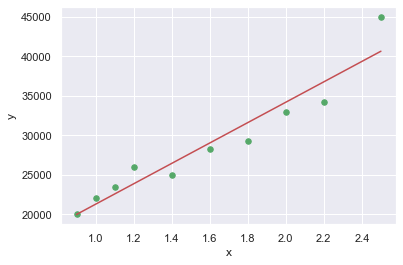

In [52]:
def main():
    # Enter small data set by hand as an array.
    x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
    y = np.array([20000, 22000, 23500, 26000, 25000, 28250,
                  29300, 33000, 34255, 45000])

    # Calculate the coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(b[0], b[1]))

    # Plot the regression line (i.e. y = mx + c).
    plot_regression_line(x, y, b)
 
main()

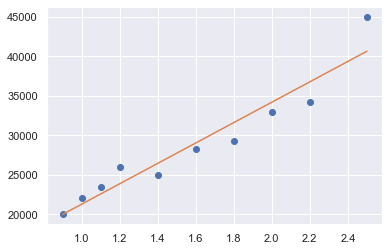

In [53]:
# Re-enter the values of x and y in your Notebook.
x = np.array([0.9, 1, 1.1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.5])
y = np.array([20000, 22000, 23500, 26000, 25000, 28250, 29300, 33000, 34255, 45000])

# Create a basic scatterplot.
plt.plot(x, y, 'o')  

# Obtain m (slope) and c (intercept) of the linear regression line.
m, c = np.polyfit(x, y, 1)

# Add the linear regression line to the scatter plot.
plt.plot(x, m*x+c)

### The OLS method and the statsmodels package

In [55]:
# Import statsmodels, NumPy, Pandas, and Matplotlib.
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and read the data file:
df_test = pd.read_csv('test.csv')

df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


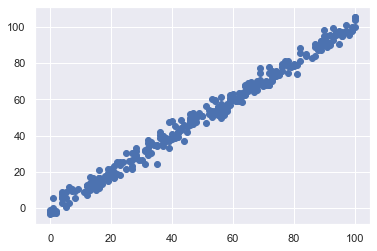

In [56]:
# Define the dependent variable.
y = df_test['y'] 

# Define the independent variable.
x = df_test['x'] 

# Check for linearity.
plt.scatter(x, y)  

In [57]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df_test).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          1.33e-294
Time:                        23:03:19   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4618      0.360     -1.284      0.200      -1.169       0.246
x              1.0143      0.006    164.598      0.000       1.002       1.026
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.825
Skew:                           0.117   Prob(JB):                        0.662
Kurtosis:                       3.104   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -0.461811
x            1.014335
dtype: float64
Standard errors:  Intercept    0.359560
x            0.006162
dtype: float64
Predicted values:  [ 77.64201157  20.83923168  21.85356704  19.82489633  36.05426201
  14.75321955  62.42698124  95.90004796  19.82489633   4.609866
   3.59553065  18.81056097  96.91438332  62.42698124  36.05426201
  14.75321955  65.46998731  13.7388842   87.78536512  69.52732873
  89.81403583  51.26929234  89.81403583  26.92524381  97.92871867
  58.36963982  79.67068228  20.83923168  93.87137725  26.92524381
  99.95738938  30.98258524  33.01125595  80.68501764  27.93957917
  47.21195092  53.29796305  69.52732873  27.93957917  33.01125595
  91.84270654  71.55599944  50.25495698  76.62767622   3.59553065
  37.06859737  70.54166408  68.51299337  40.11160343  35.03992666
  94.88571261  88.79970048  52.28362769  30.98258524  59.38397518
  -0.46181077  39.09726808  64.45565195  69.52732873  57.35530447
  12.72454884  72.57033479  76.62767622  6

In [59]:
# Set the the x coefficient to ‘1.0143’ and the constant to ’0.4618’ to generate the regression table.
y_pred = 1.0143 * df_test['x'] - 0.4618

y_pred

0      77.6393
1      20.8385
2      21.8528
3      19.8242
4      36.0530
        ...   
295    71.5535
296    46.1960
297    55.3247
298    62.4248
299    47.2103
Name: x, Length: 300, dtype: float64

# 

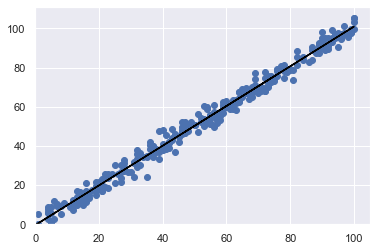

In [60]:
import matplotlib.pyplot as plt

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 1.2.5 Linear regression with scikit-learn

In [61]:
# Install the necessary modules.
!pip install scipy

In [62]:
# Import the necessary libraries, packages and modules.
import statsmodels.api as sm 
from sklearn import datasets 
import numpy as np  
from sklearn import linear_model 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Read the 'salary_data.csv' file.
data = pd.read_csv('salary_data.csv') 

# Print the table.
data.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [63]:
# More info about the DataFrame.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [65]:
# More info about the DataFrame.
data.shape

(30, 2)

In [67]:
# Prints descriptive statistics.
data.describe() 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [68]:
# Define the dependent variable.
y = data['Salary'].values.reshape(-1, 1) 

# Define the independent variable.
x = data['YearsExperience'].values.reshape(-1, 1) 

In [69]:
# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 

LinearRegression()

In [70]:
# Print the target values.
lm.predict(x)  

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [71]:
# Call the intercept.
lm.intercept_ 

array([25792.20019867])

In [72]:
# Estimated coefficients
lm.coef_ 

array([[9449.96232146]])

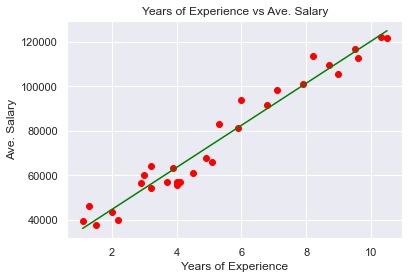

In [73]:
# Create a scatterplot (with red data points). 
plt.scatter(x, y, color = 'red')  

# Create a regression line in green.
plt.plot(x, lm.predict(x), color = 'green') 

#Set the title and labels for the graph.
plt.title("Years of Experience vs Ave. Salary") 
plt.xlabel("Years of Experience") 
plt.ylabel("Ave. Salary")

# Print the graph. 
plt.show() 

In [74]:
# Use the predict() method with an array to call the 
# salaries for each number of years’ experience.
predictedSalary = lm.predict([[5],[10],[15],[20],[25],[30]])  

# Print the results.
print(predictedSalary)

[[ 73042.01180594]
 [120291.82341322]
 [167541.63502049]
 [214791.44662777]
 [262041.25823505]
 [309291.06984232]]


In [76]:
# Run the model with the three scenarios and print the results
# Find the predicted salaries of individuals with 35, 40, 45, and 50 years of experience. 
# Write your code so that your output reads: 
#‘The predicted average salary for an individual with { } years of experience is ${ }.’

yearsdef = ([[35],[40],[45],[50]])

predictedSalary2 = lm.predict([[35],[40],[45],[50]])  

# Print the results.
print(predictedSalary2)

[[356540.8814496 ]
 [403790.69305687]
 [451040.50466415]
 [498290.31627142]]


In [80]:
print(f'The predicted average salary for an individual with {yearsdef} years of experience is ${predictedSalary2}.')
# f-strings format in python3

The predicted average salary for an individual with [[35], [40], [45], [50]] years of experience is $[[356540.8814496 ]
 [403790.69305687]
 [451040.50466415]
 [498290.31627142]].


In [81]:
#  Import the sklearn module.
from sklearn.model_selection import train_test_split 

# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variable.
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5, 
                                                 random_state=100) 

In [82]:
# We run regression on the training data set.
# Linear regression; fitting the model.
lm.fit(x_train,y_train) 

LinearRegression()

In [83]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

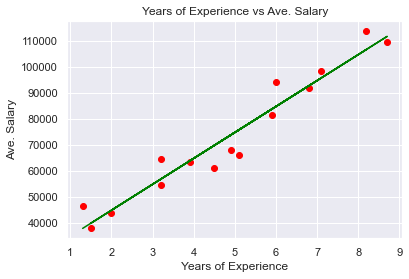

In [84]:
# Create a scatterplot with regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Years of Experience vs Ave. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Ave. Salary") 

# Print the graph. 
plt.show()  

In [85]:
# Print R-squared value of the training data.
print(lm.score(x_train,y_train)) 

0.9382035605624517


In [86]:
# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_) 

Intercept value:  [24768.13991346]
Coefficient value:  [[9981.76903593]]


### Testing the model (with the test subset)

In [87]:
# Linear regression; fitting the model.
lm.fit(x_test,y_test) 

LinearRegression()

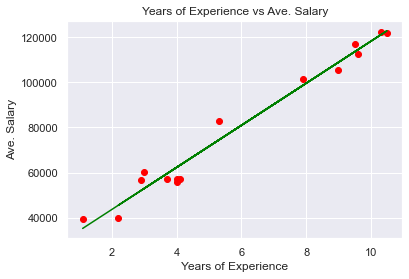

In [88]:
# Predict the test set values.
y_pred = lm.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Years of Experience vs Ave. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Ave. Salary") 

# Print the graph. 
plt.show() 

In [89]:
# Print R-squared value of the test data.
print(lm.score(x_test,y_test)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

0.9742725108027231
Intercept value:  [24929.61625619]
Coefficient value:  [[9333.43003625]]


### Using statsmodels to check homoscedasticity 

In [90]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [91]:
# Import the test data set and run the OLS on the data.
df_test = pd.read_csv('test.csv')
f = 'y ~ x'
test = ols(f, data = df_test).fit()

In [92]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [93]:
# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1.1279277316846636, 'LM Test p-value': 0.2882177894391171, 'F-stat': 1.1246365760808494, 'F-test p-value': 0.2897810117091818}


### Example of a small program for reference

In [78]:
weight_kg = input('Enter your weight(in kgms): ')
weight_lbs = int(weight_kg) * 2.20462
print('Weight in pounds is ' + str(weight_lbs)) # cast to str
print(f'Weight in pounds is {weight_lbs}') # f-strings format in python3

Enter your weight(in kgms): 5
Weight in pounds is 11.0231
Weight in pounds is 11.0231


### 1.3 CAPM and multiple regression

### 1.3.2 [Optional] CAPM in Python

#### 1. Prepare your workstation

In [94]:
# Import packages for ‘CAPM output for Apple stock’ example:
import statsmodels.api as sm 
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import time

In [95]:
# Install Pandas ‘DataReader’. 
!pip install pandas-datareader 

# Import data from the web from ‘pandas_datareader’. 
from pandas_datareader import data as web  

     |████████████████████████████████| 109 kB 695 kB/s eta 0:00:01


In [96]:
# Set the start date.
start = datetime.datetime(2021,1,1)

# Set the end date.  
end = datetime.datetime(2022,1,1)

In [97]:
# Use the Pandas Datareader to pull data from the web
# specify the 'ticket' and the website, as well as the start and end dates.
# Standard & Poors 500 Index from Yahoo Finances
# Investigate more about data sources for DataReader
df_spy = web.DataReader('SPY','yahoo',start,end)   

df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,361.251160
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,363.739197
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,365.913849
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,371.350403
2021-01-08,381.489990,377.100006,380.589996,381.260010,71677200.0,373.466248


In [98]:
# Pull Apple’s stock index.
df_apple = web.DataReader('AAPL', 'yahoo', start, end)   

# Print the results.
df_apple.head()  

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264999
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850830
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479851
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761627
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.881607


#### 2. Checking relationships and cumulative returns

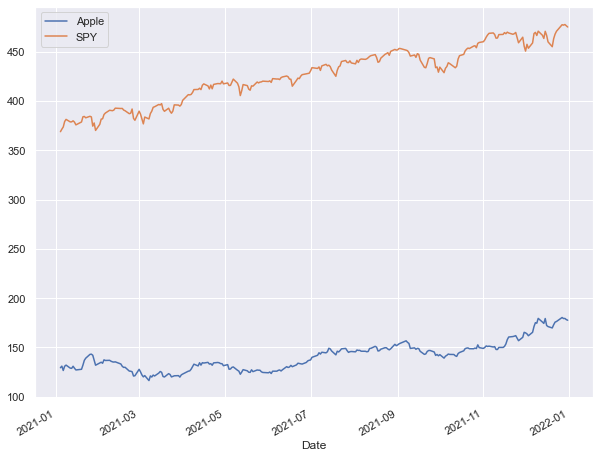

In [100]:
# Closing stock price line plot for ‘Apple’.
df_apple['Close'].plot(label = 'Apple', figsize=(10, 8))

# Closing stock price line plot for ‘SPY’.
df_spy['Close'].plot(label = 'SPY')
plt.legend()

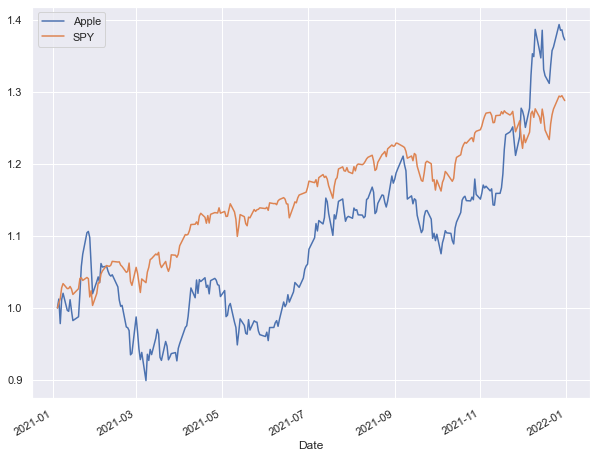

In [101]:
# Calculate the cumulative sum of closing prices for ‘Apple’ stocks 
# stores sum in a new column named 'Cumu’.
df_apple['Cumu'] = df_apple['Close']/df_apple['Close'].iloc[0]

# Calculate the cumulative sum of closing prices for ‘SPY’ stocks
# stores sum in a new column named 'Cumu’.
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0] 

# Plot line graphs for the calculated ‘Cumu’ columns for 
# both ‘Apple’ and ‘SPY’ stocks.
df_apple['Cumu'].plot(label = 'Apple', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

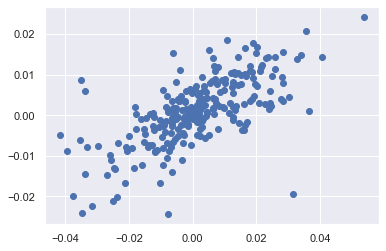

In [102]:
# Calculate daily returns and percentage change using ‘pandas pct_change()’.
df_apple['daily_ret'] = df_apple['Close'].pct_change(1) 
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

# Plot the daily returns on a scatterplot:
plt.scatter(df_apple['daily_ret'],df_spy['daily_ret'])

#### 3. Drawing the trend line

In [103]:
# Join the DataFrames.
daily_prices = pd.concat([df_apple['Close'], df_spy['Close']], axis=1)  
# Set column labels.
daily_prices.columns = ['Apple', 'SPY']  

# Print the new table.
print(daily_prices.head())  

                 Apple         SPY
Date                              
2021-01-04  129.410004  368.790009
2021-01-05  131.009995  371.329987
2021-01-06  126.599998  373.549988
2021-01-07  130.919998  379.100006
2021-01-08  132.050003  381.260010


In [104]:
# Get the percentage change. 
daily_returns = daily_prices.pct_change(1)  
# Print the percentage change.
print(daily_returns.head()) 

               Apple       SPY
Date                          
2021-01-04       NaN       NaN
2021-01-05  0.012364  0.006887
2021-01-06 -0.033662  0.005979
2021-01-07  0.034123  0.014857
2021-01-08  0.008631  0.005698


In [105]:
# Get the percentage change.
daily_returns = daily_prices.pct_change(1)  
# Remove the first row.
clean_daily_returns = daily_returns.dropna(axis=0)
# Print the new DataFrame.  
print(clean_daily_returns.head()) 

               Apple       SPY
Date                          
2021-01-05  0.012364  0.006887
2021-01-06 -0.033662  0.005979
2021-01-07  0.034123  0.014857
2021-01-08  0.008631  0.005698
2021-01-11 -0.023249 -0.006741


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     213.8
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           2.27e-35
Time:                        21:21:44   Log-Likelihood:                 927.22
No. Observations:                 251   AIC:                            -1850.
Df Residuals:                     249   BIC:                            -1843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.440      0.151      -0.000       0.001
x              0.3545      0.024     14.621      0.000       0.307       0.402
==============================================================================
Omnibus:                       35.524   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.676
Skew:                          -0.518   Prob(JB):                     8.45e-28
Kurtosis:                       6.294   Cond. No.                         63.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

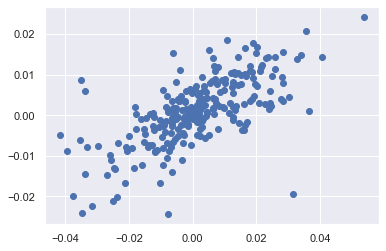

In [106]:
# Now we applicate the OLS method in statsmodel
# Create formula and pass through OLS methods.

# Define the dependent variable.
y = clean_daily_returns['SPY'] 

# Define the independent variable.
x = clean_daily_returns['Apple']  

# Check for linearity.
plt.scatter(x, y)  
f = 'y ~ x'
test = ols(f, data = clean_daily_returns).fit()

# Print the regression table.
test.summary() 

#### 4.Linear regression analysis

In [107]:
# Reshape ‘SPY’ data to 2D.
X = clean_daily_returns['SPY'].values.reshape(-1, 1)  
# Reshape ‘Apple’ data to 2D.
y = clean_daily_returns['Apple'].values.reshape(-1, 1)  

In [108]:
# Run the linear regression test.
lr = LinearRegression()  
# Fit the model.
lr.fit(X, y) 

LinearRegression()

In [109]:
# Check/Call the coefficient (beta value).
lr.coef_  

array([[1.30313819]])

In [110]:
# Check/call the intercept (c).
lr.intercept_  

array([2.68456838e-05])

In [ ]:
# Our Beta (slope or coefficient) is 1.30. This means that Apple’s stock is more volatile than the market. 

#### 5.Finding the return value (expected return)

In [111]:
# We substitute all the values (that we already have) in the CAPM formula.
# You were asked to find the CAPM output for Apple stock using stock returns from 2021, 
# and now we have the answer: the expected return, or prediction, of the Apple stock based on the CAPM 
# formula is 4.79%!

#### 6. Drawing the line of best fit

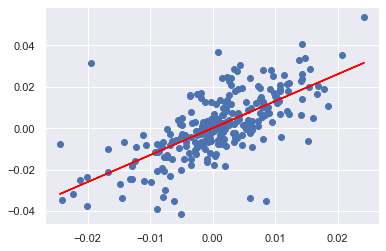

In [112]:
# Set the the x coefficient the constant (intercept)
y_pred = lr.coef_ * X + lr.intercept_

# Draw the scatterplot using Matplotlib. 
plt.scatter(X,y) 
# Plot X and predicted y as a line. Set the line colour to red.
plt.plot(X, y_pred, color='red') 

### 1.3.4 Multiple linear regression in Python

In [113]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [114]:
# Load the CSV file.
hp = pd.read_csv('house_prices.csv')  

# Print the DataFrame.
hp.head() 

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


In [115]:
# View the DataFrame.
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     506 non-null    float64
 1   Distance  506 non-null    float64
 2   Value     506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


In [116]:
# Descriptive statistics.
hp.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


In [117]:
# Define the dependent variable.
y = hp['Value']  

# Define the independent variable.
# Capital X as it is more than one. Important for designation!!
X = hp[['Rooms', 'Distance']] 

In [118]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

# Call the predictions for X (array).
mlr.predict(X) 

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776,
       24.92052548, 20.99628003, 22.59515685, 17.89792552, 21.43016488,
       24.59312806, 21.29554669, 19.86012857, 20.02480328, 21.19854962,
       18.91052046, 19.79946305, 20.16587486, 15.24036623, 17.62554884,
       16.24441157, 19.82577837, 21.36632302, 18.52848931, 19.65425152,
       16.82067934, 18.81534563, 20.76312523, 24.70679323, 26.17680132,
       17.71571146, 20.84706509, 19.68285587, 17.39216584, 20.85532906,
       19.22540394, 18.42427779, 18.77543693, 19.75391977, 26.04958067,
       29.82538634, 27.7461615 , 22.45651299, 22.82617229, 21.57637181,
       17.86689491, 18.78224174, 21.21771802, 15.7523132 , 17.64542212,
       21.17812468, 22.51593928, 26.00129836, 21.48617409, 20.7648873 ,
       33.41670435, 26.03470634, 29.42393915, 23.26887906, 20.91861579,
       19.42498135, 21.20638654, 25.71803969, 28.7805479 , 32.39778062,
       23.95685233, 19.52974218, 20.27518634, 17.77558538, 20.33

In [119]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.4955246476058477
Intercept:  -34.636050175473315
Coefficients:


[('Rooms', 8.801411828632594), ('Distance', 0.48884853656712307)]

In [120]:
# These are SENSITIVITIES: all things equal, how much the price varies per one unit variation 
# of the independent variables.

In [121]:
# Create a variable 'New_Rooms' and define it as 5.7.
New_Rooms = 5.75

# Create 'New_Distance' and define it as 15.2.
New_Distance = 15.2  

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[New_Rooms ,New_Distance]])) 

Predicted Value: 
 [23.40256559]


In [122]:
# Create a variable 'New_Rooms' and define it as 6.75 (previous value + 1 unit).
New_Rooms = 6.75

# Create 'New_Distance' and define it as 15.2 (this value remains equal).
New_Distance = 15.2  

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[New_Rooms ,New_Distance]])) 

Predicted Value: 
 [32.20397742]


In [124]:
# Create a variable 'New_Rooms' and define it as 6.75 (previous value).
New_Rooms = 6.75

# Create 'New_Distance' and define it as 16.2 (previous + 1).
New_Distance = 16.2  

# Print the predicted value. 
print ("Predicted Value: \n", mlr.predict([[New_Rooms ,New_Distance]])) 

Predicted Value: 
 [32.69282596]


In [123]:
# We can see here that SENSITIVITIES work well.

In [125]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,
                                                                            y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [126]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.33e-52
Time:                        11:10:59   Log-Likelihood:                -1352.5
No. Observations:                 404   AIC:                             2711.
Df Residuals:                     401   BIC:                             2723.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.8597      3.141    -10.462      0.0

In [127]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model.
mlr.fit(X_test, Y_test)  

LinearRegression()

In [128]:
# Call the predictions for X in the test set.
y_pred_mlr= mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [39.5007791  26.01220208 23.40571915  7.97760017 36.32952212 12.03353551
 28.71120259 26.60195665 26.25329031 23.55549835 33.39311645 19.5529638
 19.00355373 31.74108834 24.80646556 19.47964643  5.31935431 13.00959399
 13.16804638 16.45968889  9.9881162  22.77207093 41.65869276 23.16761129
 31.08463065 17.53857053 23.35625302 20.93113313 23.23435817 26.88390622
 17.57037584 13.14888443 17.83727856 32.90891385 24.76823466 22.30287688
 25.7837162  17.95773792 42.81614435 29.98205908 20.86835099  9.16135295
 25.43949309 18.91471376 25.41807537 29.06482076  4.2661231  18.64474863
 20.12296035 20.63616287 20.29657713 20.67154466 22.45611771 20.39267666
 16.03630521 24.5691534  37.39196791 24.31316323 26.69493635 19.82799285
 19.39924173 19.58999435 15.91856374 28.31314942 20.44430288 12.49256072
 24.51304292 22.0135639  19.43232398 18.35263298 23.8752249  20.37453461
 16.0758568  27.31107959 14.9534151  28.7072379  17.87693131 14.90371929
 32.16362438 19.03792108 21

In [129]:
# Print the R-squared value.
print(mlr.score(X_test,Y_test)*100) 

71.03671013608054


### Checking multicollinearity 

In [132]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. vif["VIF Factor"] = [variance_inflation_factor(x_temp.values,
#i) for i in range(x_temp.values.shape[1])]  
# Calculate the ‘vif’ for each value.
vif = pd.DataFrame()

# Add from Dr James Abdey video
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor  features
0       83.56     const
1        1.04     Rooms
2        1.04  Distance


In [133]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 3.4749451018628648
Mean Square Error (Final): 24.056805405025848


## 1.1.6 Practical activity: Conduct A/B testing in Python

#### 1. Import and install the necessary libraries

In [134]:
# Install the relevant modules:
!pip install scipy

# Import necessary libraries, packages and classes.
import pandas as pd
import math
import numpy as np
import statsmodels.stats.api as sms
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

In [135]:
# Import statsmodel for statistical calculations and 
# ‘TTestIndPower’ class to calculate the parameters.
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

#### 2. Conduct a power analysis

In [139]:
# Specify the three required parameters for the power analysis:
alpha = 0.05 
power = 0.8 
effect = sms.proportion_effectsize(0.50, 0.55) 

# Perform power analysis by using the solve_power() function:
# Specify an instance of ‘TTestIndPower’.
analysis = TTestIndPower() 
# Calculate the sample size and list the parameters.
result = analysis.solve_power(effect, power=power, nobs1=None,
                              ratio=1.0, alpha=alpha) 

# Print the output.
print('Sample Size: %.3f' % result)

Sample Size: 1565.490


#### 3. Prepare the data in Python

In [136]:
# Read the CSV file.
df = pd.read_csv('new_bike_shop_AB.csv')

# View the DataFrame.
df.head()

,Unnamed: 0,RecordID,IPAddress,LoyaltyPage,ServerID,VisitPageFlag
0,0,1,39.13.114.2,1,2,0
1,1,2,13.3.25.8,1,1,0
2,2,3,247.8.211.8,1,1,0
3,3,4,124.8.220.3,0,3,0
4,4,5,60.10.192.7,0,2,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184588 entries, 0 to 184587
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     184588 non-null  int64 
 1   RecordID       184588 non-null  int64 
 2   IPAddress      184588 non-null  object
 3   LoyaltyPage    184588 non-null  int64 
 4   ServerID       184588 non-null  int64 
 5   VisitPageFlag  184588 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 8.4+ MB


In [138]:
# Pandas's duplicated() function to check the user_id column. 
print(df[df.IPAddress.duplicated()])

        Unnamed: 0  RecordID     IPAddress  LoyaltyPage  ServerID  \
275            275       276    191.4.97.7            0         2   
394            394       395     79.9.70.7            1         3   
703            703       704    175.1.81.8            1         3   
809            809       810    125.0.30.9            1         2   
889            889       890  207.14.157.6            1         3   
...            ...       ...           ...          ...       ...   
184582      184582    184583    90.4.224.4            0         3   
184583      184583    184584   114.8.104.1            0         1   
184585      184585    184586   170.13.31.9            0         2   
184586      184586    184587   195.14.92.3            0         3   
184587      184587    184588  172.12.115.8            0         2   

        VisitPageFlag  
275                 0  
394                 0  
703                 0  
809                 0  
889                 0  
...               ...  
184

In [140]:
# Use ‘drop_duplicates’ to return the Series without the duplicate values.
df2 = df.drop_duplicates(subset = 'IPAddress') 

# Check the metadata.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99516 entries, 0 to 184584
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     99516 non-null  int64 
 1   RecordID       99516 non-null  int64 
 2   IPAddress      99516 non-null  object
 3   LoyaltyPage    99516 non-null  int64 
 4   ServerID       99516 non-null  int64 
 5   VisitPageFlag  99516 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 5.3+ MB


In [146]:
# Use ‘dropped.drop’ to remove irrelevant columns from the DataFrame. 
# Specify that ‘user_id’ and ‘timestamp’ are columns (i.e. ‘axis 1’). 
df_final = df2.drop(['Unnamed: 0', 'RecordID', 'VisitPageFlag'], axis=1)  

# Check the DataFrame.
df_final.head()

,IPAddress,LoyaltyPage,ServerID
0,39.13.114.2,1,2
1,13.3.25.8,1,1
2,247.8.211.8,1,1
3,124.8.220.3,0,3
4,60.10.192.7,0,2


In [147]:
# Use ‘crosstab’ to compute a simple cross-tabulation between two variables.
pd.crosstab(df_final['ServerID'], df3['LoyaltyPage'])

LoyaltyPage,0,1
ServerID,,
1,16501,16728
2,16248,16857
3,16639,16543


#### 4. Subset the DataFrame

In [148]:
# Split data set into ID1 as treatment and ID2 & ID3 as control groups.
df_final['Group'] = df_final['ServerID'].map({1:'Treatment', 2:'Control', 3:'Control'})

# View DataFrame.
print(df_final.shape)
df_final.head()

(99516, 4)


,IPAddress,LoyaltyPage,ServerID,Group
0,39.13.114.2,1,2,Control
1,13.3.25.8,1,1,Treatment
2,247.8.211.8,1,1,Treatment
3,124.8.220.3,0,3,Control
4,60.10.192.7,0,2,Control


In [149]:
# count the values
df_final["Group"].value_counts()

Control      66287
Treatment    33229
Name: Group, dtype: int64

In [150]:
# Create two DataFrames.
# You can use any random_state.
c_sample = df_final[df_final['Group'] == 'Control'].sample(n=1565,
                                                           random_state=0) 

t_sample = df_final[df_final['Group'] == 'Treatment'].sample(n=1565,
                                                             random_state=0)

# View the DataFrames.
print(c_sample)
print(t_sample)

           IPAddress  LoyaltyPage  ServerID    Group
52958   116.12.181.5            1         2  Control
3513      218.8.34.2            1         2  Control
313       132.9.22.6            1         2  Control
3458     107.10.64.9            1         3  Control
34352     140.5.35.8            1         3  Control
...              ...          ...       ...      ...
26238      213.6.0.6            0         2  Control
52650     240.4.10.3            1         3  Control
4468      163.8.23.2            0         2  Control
157789     47.3.27.6            1         3  Control
129899   30.12.124.4            1         3  Control

[1565 rows x 4 columns]
           IPAddress  LoyaltyPage  ServerID      Group
138921   138.13.62.8            0         1  Treatment
74619     25.0.222.3            1         1  Treatment
105633    16.7.187.9            0         1  Treatment
15759    54.14.243.7            0         1  Treatment
67650    113.2.137.6            1         1  Treatment
...      

In [151]:
# Join the two samples.  
ab_test = pd.concat([c_sample, t_sample], axis=0)  

# Reset the A/B index.
ab_test.reset_index(drop=True, inplace=True) 

# Print the sample table.
ab_test

,IPAddress,LoyaltyPage,ServerID,Group
0,116.12.181.5,1,2,Control
1,218.8.34.2,1,2,Control
2,132.9.22.6,1,2,Control
3,107.10.64.9,1,3,Control
4,140.5.35.8,1,3,Control
...,...,...,...,...
3125,28.10.232.8,0,1,Treatment
3126,214.4.21.3,0,1,Treatment
3127,185.12.113.2,1,1,Treatment
3128,245.13.6.3,0,1,Treatment


#### 5. Analyse the data

In [152]:
# Import library.
from scipy.stats import sem

# Group the ab_test data set by group and aggregate by converted.
conversion_rates = ab_test.groupby('Group')['LoyaltyPage']

# Calculate conversion rates by calculating the means of columns STD_p and SE_p.
conversion_rates = conversion_rates.agg([np.mean, np.std,sem])

# Assign names to the three columns.
conversion_rates.columns = ['conversion_rate', 'std_deviation','std_error']  

# Round the output to 3 decimal places.
conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
Group,,,
Control,0.514,0.500,0.013
Treatment,0.482,0.500,0.013


In [156]:
# Import proportions_ztest and proportion_confint from statsmodels.
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Create a subset of control and treatment results.
control_results = ab_test[ab_test['Group'] == 'Control']['LoyaltyPage']
treatment_results = ab_test[ab_test['Group'] == 'Treatment']['LoyaltyPage']

# Determine the count of the control_results and 
# treatment_result sub-datasets and store them in their respective variables.
n_con = control_results.count()
n_treat = treatment_results.count()

# Create a variable ‘success’ with the sum of the two data sets
# in a list format: 
successes = [control_results.sum(), treatment_results.sum()]

# Create a variable ‘nobs’ which stores the values of 
# variables n_con and n_treat in list format. 
nobs = [n_con, n_treat] 

# Use the imported libraries to calculate the statistical values. 
z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes,
                                                                        nobs=nobs,
                                                                        alpha=0.05)

# Print the outputs (with lead-in text).
print(f'Z test stat: {z_stat:.2f}')
print(f'P-value: {pval:.3f}')
print(f'Confidence Interval of 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Confidence Interval of 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

Z test stat: 1.75
P-value: 0.080
Confidence Interval of 95% for control group: [0.489, 0.539]
Confidence Interval of 95% for treatment group: [0.458, 0.507]


#### 6. Explain and summarise your findings


Confidence interval for the treatment group is 45.8% to 50.7%, not reaching 55% desired. The change to the homepage slightly decreased the click through to the log in page, so a re-think of the strategy would be advised to the business.

The p-value (0.08) is well over the Alpha value of 0.05, meaning the null hypothesis cannot be rejected.

### 1.1.9 Practical activity: Summarising model outputs

In [159]:
# Defines classes to contain and encapsulate data.
from dataclasses import dataclass 
import pandas as pd
# Import in-built module for generating random numbers. 
import random 
# Display output inline.
%matplotlib inline
# Import to replicate a nested loop over the input values.
from sensitivity import SensitivityAnalyzer 

In [160]:
# Create a DataFrame consisting of various classes using Python's 'dataclass()'
# module and Object Oriented programming (OPP).
@dataclass

class ModelInputs: 
    # Define the class and specify the default inputs. 
    starting_salary: int = 250000
    promos_every_n_years: int = 2
    cost_of_living_raise: float = 0.03
    promo_raise: float = 0.10
    savings_rate: float = 0.15
    interest_rate: float = 0.05
    desired_cash: int = 2000000

# Create an instance of the new class with the default inputs.
model_data = ModelInputs() 

# Print the results.
model_data

ModelInputs(starting_salary=250000, promos_every_n_years=2, cost_of_living_raise=0.03, promo_raise=0.1, savings_rate=0.15, interest_rate=0.05, desired_cash=2000000)

In [163]:
# Get the wage at a given year from the start of the model based 
# on the cost of living raises and regular promotions.
def wages_year(data: ModelInputs, year):
    # Every n years we have a promotion, so dividing the years and
    # taking out the decimals gets the number of promotions.
    num_promos = int(year / data.promos_every_n_years)  
    
   # This is the formula above implemented in Python.
    salary_t = data.starting_salary * (1 + data.cost_of_living_raise)\
    ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

# Show the first four salaries in the range and 
# print the results using the f-string.
for i in range(10):
    year = i + 1
    salary = wages_year(model_data, year)
    print(f'The wage at year {year} is £{salary:,.0f}.')

The wage at year 1 is £257,500.
The wage at year 2 is £291,748.
The wage at year 3 is £300,500.
The wage at year 4 is £340,466.
The wage at year 5 is £350,680.
The wage at year 6 is £397,321.
The wage at year 7 is £409,241.
The wage at year 8 is £463,670.
The wage at year 9 is £477,580.
The wage at year 10 is £541,098.


In [164]:
# Calculate the cash saved within a given year by first 
# calculating the salary at that year then applying the savings rate.
def cash_saved_during_year(data: ModelInputs, year):
    salary = wages_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

# Calculate the accumulated wealth for a given year based
# on previous wealth, the investment rate, and cash saved during the year.
def wealth_year(data: ModelInputs, year, prior_wealth):
                cash_saved = cash_saved_during_year(data, year)
                wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
                return wealth

In [165]:
# Start with no cash saved.
prior_wealth = 0  
for i in range(10):
    year = i + 1
    wealth = wealth_year(model_data, year, prior_wealth)
    print(f'The wealth at year {year} is £{wealth:,.0f}.')
    
    # Set next year's prior wealth to this year's wealth:
    prior_wealth = wealth

The wealth at year 1 is £38,625.
The wealth at year 2 is £84,318.
The wealth at year 3 is £133,609.
The wealth at year 4 is £191,360.
The wealth at year 5 is £253,530.
The wealth at year 6 is £325,804.
The wealth at year 7 is £403,481.
The wealth at year 8 is £493,205.
The wealth at year 9 is £589,502.
The wealth at year 10 is £700,142.


In [166]:
def years_to_retirement(data: ModelInputs, print_output=True):
    # Start with no cash saved.
    prior_wealth = 0  
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  
   
    if print_output:
        print('Wealths over time:')
    while wealth < data.desired_cash:
        year = year + 1
        wealth = wealth_year(data, year, prior_wealth)
        if print_output:
            print(f'The wealth at year {year} is £{wealth:,.0f}.')
            # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth  
       
    # Now we have run the while loop, the wealth must be >= desired_cash 
    # (whatever last year was set is the years to retirement), which we can print.
    if print_output:
        # \n makes a blank line in the output.
        print(f'\nRetirement:\nIt will take {year} years to retire.')  
    return year

In [167]:
years = years_to_retirement(model_data)

Wealths over time:
The wealth at year 1 is £38,625.
The wealth at year 2 is £84,318.
The wealth at year 3 is £133,609.
The wealth at year 4 is £191,360.
The wealth at year 5 is £253,530.
The wealth at year 6 is £325,804.
The wealth at year 7 is £403,481.
The wealth at year 8 is £493,205.
The wealth at year 9 is £589,502.
The wealth at year 10 is £700,142.
The wealth at year 11 is £818,749.
The wealth at year 12 is £954,405.
The wealth at year 13 is £1,099,685.
The wealth at year 14 is £1,265,204.
The wealth at year 15 is £1,442,316.
The wealth at year 16 is £1,643,425.
The wealth at year 17 is £1,858,460.
The wealth at year 18 is £2,101,917.

Retirement:
It will take 18 years to retire.


In [170]:
# Define the function that accepts the individual parameters.
def years_to_retirement_separate_args(
    # List the parameters and set their values.
    starting_salary=250000, 
    promos_every_n_years=2, 
    cost_of_living_raise=0.03,
    promo_raise= 0.10, 
    savings_rate=0.15, 
    interest_rate=0.05, 
    desired_cash=2000000):  
    # Update the values of the parameters:
    data = ModelInputs(
        starting_salary=starting_salary, 
        promos_every_n_years=promos_every_n_years, 
        cost_of_living_raise=cost_of_living_raise, 
        promo_raise=promo_raise, 
        savings_rate=savings_rate, 
        interest_rate=interest_rate, 
        desired_cash=desired_cash)
       
    return years_to_retirement(data, print_output=False)

# Call the function.
years_to_retirement_separate_args()

18

In [174]:
# Use Python’s ‘list comprehensions’ syntax to make it easier to adjust the inputs. 
# Use i as a temporary variable to store the value’s position in the range:
sensitivity_values = {
    'starting_salary': [i * 10000 for i in range(15, 35)],
    'promos_every_n_years': [i for i in range(1, 4)],
    'cost_of_living_raise': [i/100 for i in range(1, 4)],
    'promo_raise': [i/100 for i in range(10, 25, 50)],
    'savings_rate': [i/100 for i in range(10, 15, 20)],
    'interest_rate': [i/100 for i in range(3, 8)],
    'desired_cash': [i * 100000 for i in range(10, 15, 20)]}

In [175]:
# Run the Python’s SensitivityAnalyzer with the all the assigned inputs:
sa = SensitivityAnalyzer(
    sensitivity_values,
    years_to_retirement_separate_args,
    result_name='Years to Retirement',
    reverse_colors=True,
    grid_size=3)

100%|███████████████████████████████████████| 900/900 [00:00<00:00, 1717.46it/s]


In [176]:
# Display the results using a DataFrame.
styled_dict = sa.styled_dfs(num_fmt='{:.1f}') 

,1,2,3
starting_salary,,,
150000,16.7,21.0,23.1
160000,16.3,20.4,22.1
170000,16.0,19.9,21.9
180000,15.6,19.3,21.1
190000,15.3,18.9,20.6
200000,14.9,18.5,20.1
210000,14.5,18.0,19.5
220000,14.3,17.6,19.1
230000,14.1,17.2,18.7


,0.01,0.02,0.03
starting_salary,,,
150000,21.2,20.3,19.3
160000,20.6,19.6,18.7
170000,20.2,19.3,18.3
180000,19.5,18.7,17.9
190000,19.2,18.3,17.3
200000,18.6,17.8,17.1
210000,18.1,17.3,16.6
220000,17.7,17.1,16.2
230000,17.5,16.6,15.9


,0.1
starting_salary,
150000,20.3
160000,19.6
170000,19.3
180000,18.7
190000,18.3
200000,17.8
210000,17.4
220000,17.0
230000,16.7


,0.1
starting_salary,
150000,20.3
160000,19.6
170000,19.3
180000,18.7
190000,18.3
200000,17.8
210000,17.4
220000,17.0
230000,16.7


,0.03,0.04,0.05,0.06,0.07
starting_salary,,,,,
150000,21.9,21.0,20.2,19.4,18.8
160000,21.1,20.3,19.4,19.0,18.2
170000,20.6,20.0,19.3,18.6,17.9
180000,20.2,19.3,18.6,18.0,17.3
190000,19.4,19.0,18.2,17.6,17.1
200000,19.2,18.4,17.7,17.2,16.6
210000,18.6,17.9,17.3,16.9,16.1
220000,18.3,17.6,17.0,16.2,15.9
230000,17.8,17.1,16.8,16.1,15.6


,1000000
starting_salary,
150000,20.3
160000,19.6
170000,19.3
180000,18.7
190000,18.3
200000,17.8
210000,17.4
220000,17.0
230000,16.7


,0.01,0.02,0.03
promos_every_n_years,,,
1,14.3,13.9,13.3
2,17.8,17.0,16.2
3,19.4,18.4,17.6


,0.1
promos_every_n_years,
1,13.9
2,17.0
3,18.5


,0.1
promos_every_n_years,
1,13.9
2,17.0
3,18.5


,0.03,0.04,0.05,0.06,0.07
promos_every_n_years,,,,,
1,14.5,14.2,13.8,13.5,13.2
2,18.2,17.6,17.0,16.4,15.8
3,20.1,19.1,18.4,17.7,17.0


,1000000
promos_every_n_years,
1,13.9
2,17.0
3,18.5


,0.1
cost_of_living_raise,
0.01,17.2
0.02,16.4
0.03,15.7


,0.1
cost_of_living_raise,
0.01,17.2
0.02,16.4
0.03,15.7


,0.03,0.04,0.05,0.06,0.07
cost_of_living_raise,,,,,
0.01,18.5,17.8,17.1,16.5,16.0
0.02,17.6,16.9,16.4,15.9,15.3
0.03,16.7,16.2,15.7,15.2,14.8


,1000000
cost_of_living_raise,
0.01,17.2
0.02,16.4
0.03,15.7


,0.1
promo_raise,
0.1,16.4


,0.03,0.04,0.05,0.06,0.07
promo_raise,,,,,
0.1,17.6,17.0,16.4,15.9,15.4


,1000000
promo_raise,
0.1,16.4


,0.03,0.04,0.05,0.06,0.07
savings_rate,,,,,
0.1,17.6,17.0,16.4,15.9,15.4


,1000000
savings_rate,
0.1,16.4


,1000000
interest_rate,
0.03,17.6
0.04,17.0
0.05,16.4
0.06,15.9
0.07,15.4


#### Solution provided

In [177]:
# Runs the retirement model; collects salary and wealth information year by year
# and stores it in a DataFrame for further analysis.
def get_salaries_wealths_df(data):
    # Start with no cash saved.
    prior_wealth = 0   
    wealth = 0
    # The ‘year’ becomes ‘1’ on the first loop.
    year = 0  

    df_data_tups = []
    while wealth < data.desired_cash:
        year = year + 1
        salary = wages_year(data, year)
        wealth = wealth_year(data, year, prior_wealth)

         # Set next year's prior wealth to this year's wealth.
        prior_wealth = wealth 

        # Save the results in a tuple for later building the DataFrame.
        df_data_tups.append((year, salary, wealth))
        
    # Now we have run the while loop, so wealth must be >= desired_cash. 
    # Create the DataFrame.
    df = pd.DataFrame(df_data_tups, columns=['Year', 'Salary', 'Wealth'])
    
    return df

In [178]:
# Format DataFrame for display.
get_salaries_wealths_df(model_data)

,Year,Salary,Wealth
0,1,2.575000e+05,3.862500e+04
1,2,2.917475e+05,8.431838e+04
2,3,3.004999e+05,1.336093e+05
3,4,3.404664e+05,1.913597e+05
4,5,3.506804e+05,2.535298e+05
5,6,3.973209e+05,3.258044e+05
6,7,4.092405e+05,4.034807e+05
7,8,4.636695e+05,4.932051e+05
8,9,4.775796e+05,5.895023e+05
9,10,5.410977e+05,7.001421e+05


In [181]:
# Save the function results into the DataFrame.
results_df = get_salaries_wealths_df(model_data)

# View the DataFrame.
results_df.tail()

,Year,Salary,Wealth
13,14,7.369024e+05,1.265204e+06
14,15,7.590094e+05,1.442316e+06
15,16,8.599577e+05,1.643425e+06
16,17,8.857564e+05,1.858460e+06
17,18,1.003562e+06,2.101917e+06


<AxesSubplot:xlabel='Year'>

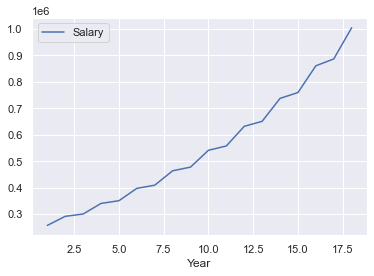

In [182]:
# Visualise wage or salary change over time.
results_df.plot( 'Year' , 'Salary')

<AxesSubplot:xlabel='Year'>

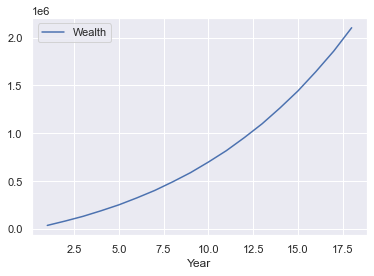

In [183]:
# Visualise wealth (savings) change over time.
results_df.plot( 'Year' , 'Wealth')

The results are very clear:
- If our client wants to retire with savings of £2m will under our model that will take 18 years
- If he/she decides to reduce the prevision to £1m that will take 12 years
